# Question 01


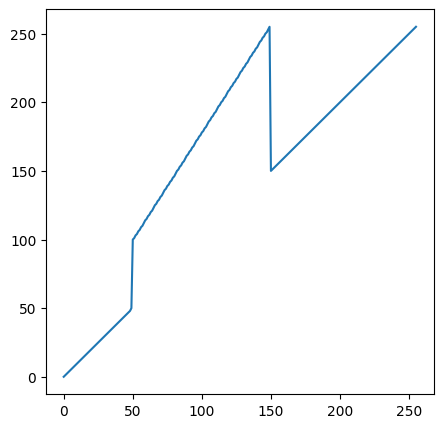

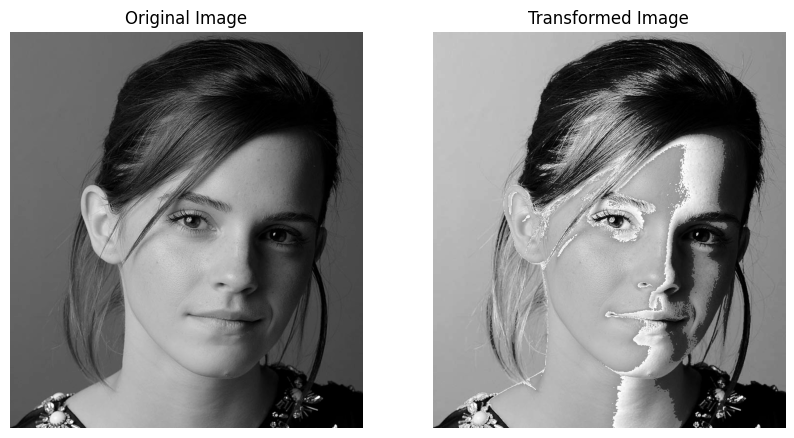

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

t1 = np.linspace(0,50,50).astype('uint8')
t2 = np.linspace(100,255,100).astype('uint8')
t3 = np.linspace(150,255,106).astype('uint8')

transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8')

plt.figure(figsize=(5,5))
plt.plot(transform)
plt.show()

image_orig = cv.imread(r'emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = transform[image_orig]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)  
plt.imshow(image_orig,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_transformed,cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()


Here only the pixels which have middle intensity values are transformed. They are transformed into higher intesity values. The pixels which have higher or lower intensity values are not transformed. 

# Question 02

(-0.5, 180.5, 216.5, -0.5)

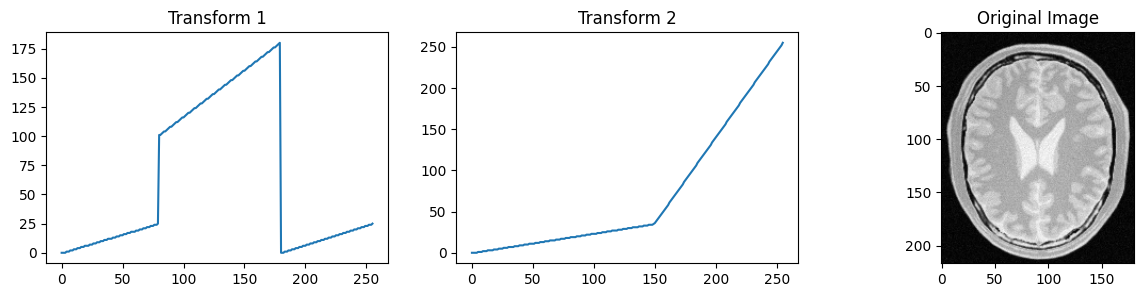

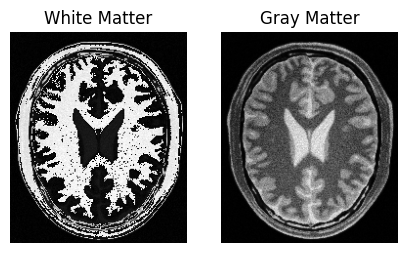

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

brain_proton = cv.imread(r'BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0,25,80)
t2 = np.linspace(101,180,100)
t3 = np.linspace(0,25,76)

transform1 = np.concatenate((t1,t2,t3), axis=0).astype(np.uint8)

t4= np.linspace(0,35,150)
t5 = np.linspace(36,255,106)


transform2 = np.concatenate((t4,t5), axis=0).astype(np.uint8)

white_matter = transform1[brain_proton]
gray_matter = transform2[brain_proton]

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.plot(transform1)
plt.title('Transform 1')
plt.subplot(1,3,2)
plt.plot(transform2)
plt.title('Transform 2')
plt.subplot(1,3,3)
plt.imshow(brain_proton,cmap='gray')
plt.title('Original Image')

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(white_matter,cmap='gray')
plt.title('White Matter')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray_matter,cmap='gray')
plt.title('Gray Matter')
plt.axis('off')

White matter contains generally in the range of intensity values 80 - 180. So, the pixels which have intensity values in this range are transformed into higher intensity values. The pixels which have higher or lower intensity values are transformed into darker intensity values to highlight the white matter.

Gray matter contains brighter intensity values. So, the pixels which have intensity values in this range are transformed into higher intensity values. The pixels which have lower intensity values are transformed into darker intensity values to highlight the gray matter.

# Question 03

Text(0.5, 1.0, 'Gamma Corrected Image L Channel Histogram')

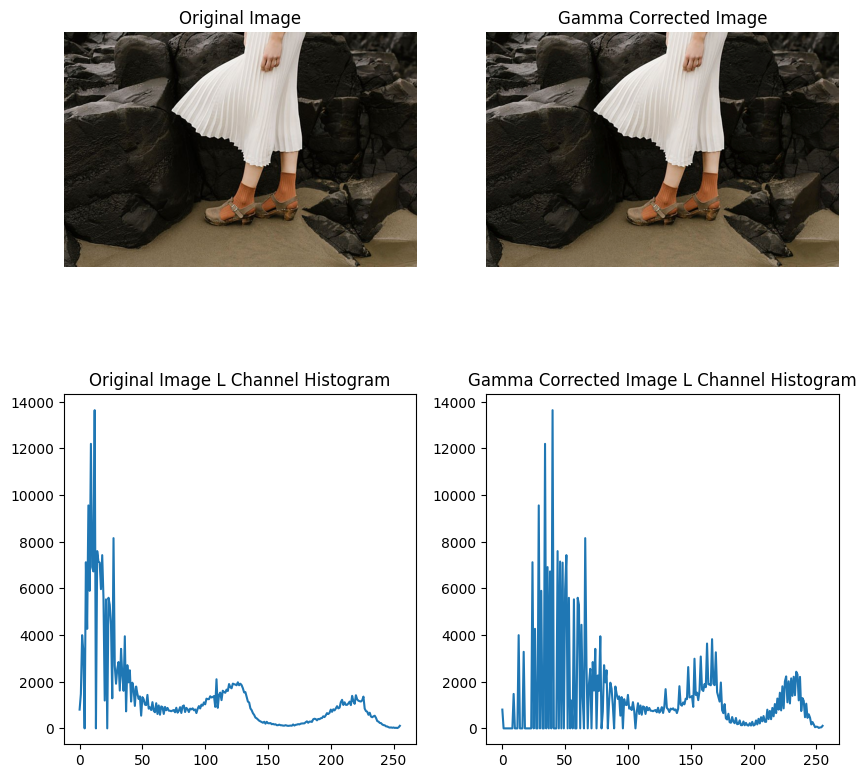

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

LAB_image = cv.cvtColor(image,cv.COLOR_RGB2LAB)

gamma = 0.6
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')
Gamma_corrected_LAB_image = LAB_image.copy()
Gamma_corrected_LAB_image[:,:,0] = cv.LUT(LAB_image[:,:,0], table)
Gamma_corrected_image = cv.cvtColor(LAB_image,cv.COLOR_LAB2RGB).astype('uint8')

hist_original = cv.calcHist([LAB_image],[0],None,[256],[0,256])
hist_gamma_corrected = cv.calcHist([Gamma_corrected_LAB_image],[0],None,[256],[0,256])

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(Gamma_corrected_image)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(hist_original)
plt.title('Original Image L Channel Histogram')

plt.subplot(2,2,4)
plt.plot(hist_gamma_corrected)
plt.title('Gamma Corrected Image L Channel Histogram')


Gamma correction is used to equalize the image. Here I have converted image into Lab color space. L channel corresponds to the intensity(lightness) values. a channel corresponds to the red-green axis and b channel corresponds to the blue-yellow axis. So, I have applied gamma correction to L channel. Since L chanel is independant of color informations and encodes only brighteness informations, by applying gamma correction to L channel, overall brigtness of image has increased. Therefore, now darker areas of original image can visible more clearly. 

# Question 04

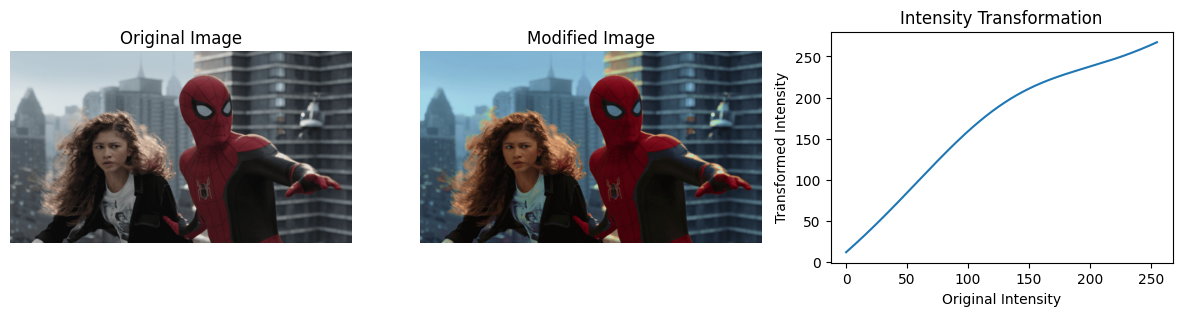

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'spider.png', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

saturation = image_hsv[:, :, 1]

sigma = 70
a = 0.5

def intensity_transform(x):
    return x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * (sigma ** 2)))

saturation_transformed = intensity_transform(saturation)

modified_image_hsv = image_hsv.copy()
modified_image_hsv[:, :, 1] = saturation_transformed

modified_image_rgb = cv.cvtColor(modified_image_hsv, cv.COLOR_HSV2RGB)

y = np.arange(0, 256)
x = np.arange(0, 256)
y_transformed = intensity_transform(y)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(modified_image_rgb)
plt.title('Modified Image')
plt.axis('off')


plt.subplot(133)
plt.plot(x, y_transformed)
plt.title('Intensity Transformation')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')

plt.show()


First, image has been coverted to HSV plane. H corresponds to the hue, S corresponds to the saturation and V corresponds to the value. 
Hue represents the color itself and is often described in terms of the dominant wavelength of light. It ranges from 0 to 360 degrees or 0 to 1 in normalized scale. In the HSV color space, changing the hue value alters the perceived color of the pixel.
Saturation measures the intensity or purity of the color. A higher saturation value means the color is more vivid and intense, while a lower value results in a more washed-out or grayish appearance. Saturation ranges from 0 (gray) to 1 (fully saturated).
Value represents the brightness or lightness of the color. A higher value results in a lighter color, while a lower value leads to a darker color. Value also ranges from 0 (black) to 1 (white).

Intensity transfoemation is applied to saturation plane. By changing value of a we can change the contrast of the image. Increasing value of a results more contrast image making it sharper. Decreasing value of a results less contrast image making it blurrier. By changing value of sigma we can change the brigtness of image. 

# Question 05

Text(0.5, 1.0, 'Equalized Image Histogram')

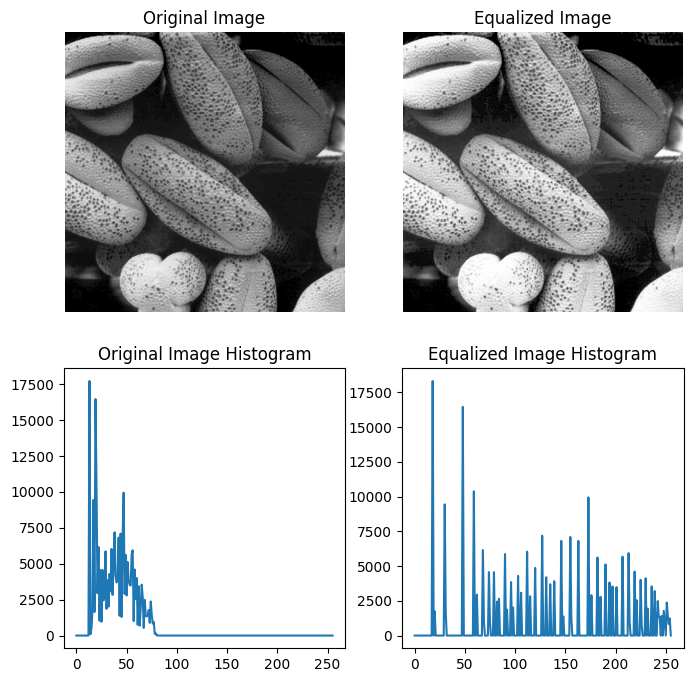

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'shells.tif', cv.IMREAD_GRAYSCALE)

hist_original = cv.calcHist([image],[0],None,[256],[0,256])

cdf = np.zeros(256)
cdf[0] = float(hist_original[0])
for i in range(1,256):
    cdf[i] = float(cdf[i-1] + hist_original[i])

cdf_normalized = cdf * 255 / cdf.max()

image_equalized = cdf_normalized[image].astype('uint8') 


hist_equalized = cv.calcHist([image_equalized],[0],None,[256],[0,256])

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_equalized,cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(hist_original)
plt.title('Original Image Histogram')

plt.subplot(2,2,4)
plt.plot(hist_equalized)
plt.title('Equalized Image Histogram')



Here, histogram equalization has applied. Histogram equalization is also used to increase the contrast and visibility of image. It is done by streching the intensity value of pixels over fully dynamic range. This is done by mappying intensity values to cdf normalized values. When applying histogram equalization to color images, usually histogram equlization is applied to each channel seperately. 

Some of the disadvantages of histogram equalization are:
1. It is not suitable for images which have extreme intensity values.
2. loss of local contrast


# Question 06

Text(0.5, 1.0, 'Histograms of Foreground')

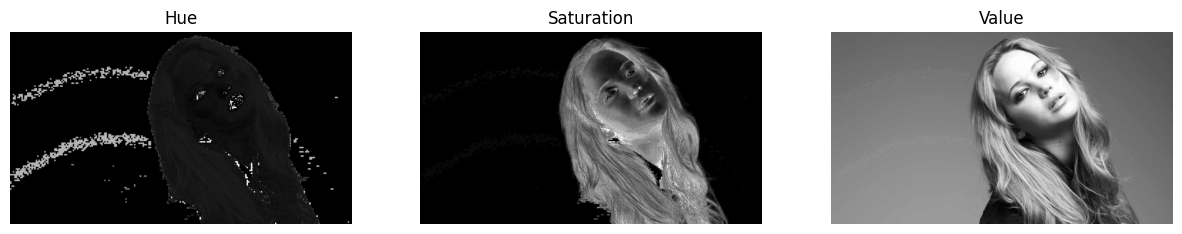

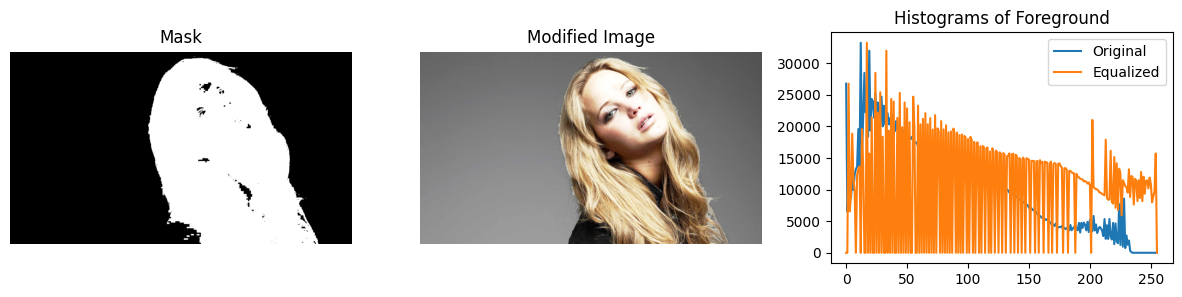

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'jeniffer.jpg', cv.IMREAD_COLOR)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')
plt.axis('off')


t1,mask = cv.threshold(saturation, 20, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(image, image, mask=mask)
hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0, 256])

cdf = np.cumsum(hist_foreground)
cdf_normalized = cdf * 255 / cdf.max()
foreground_equalized = cdf_normalized[foreground].astype('uint8')
hist_foreground_equalized = cv.calcHist([foreground_equalized], [0], mask, [256], [0, 256])

background = cv.subtract(image, foreground)

modified_image = cv.add(background, foreground_equalized)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(modified_image ,cv.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.subplot(133)
plt.plot(hist_foreground)
plt.plot(hist_foreground_equalized)
plt.legend(['Original', 'Equalized'])
plt.title('Histograms of Foreground')





Here, image has converted to HSV plane. Saturation plane is selected to thershold and create a mask for exctract the foreground. Extracted foreground is histogram equalized to obtain a pleasing image. Then, foreground is added to the background.

# Question 07

(-0.5, 363.5, 379.5, -0.5)

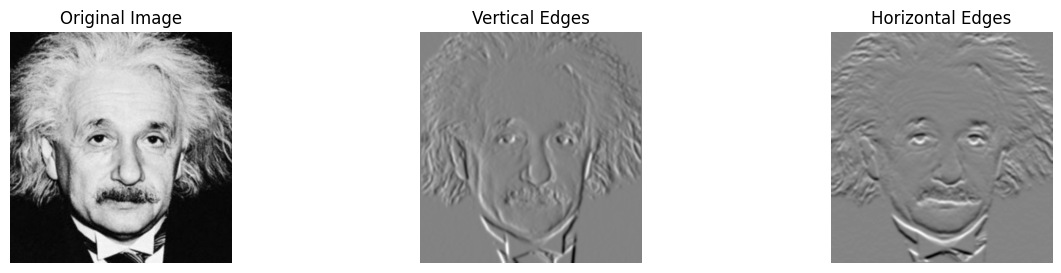

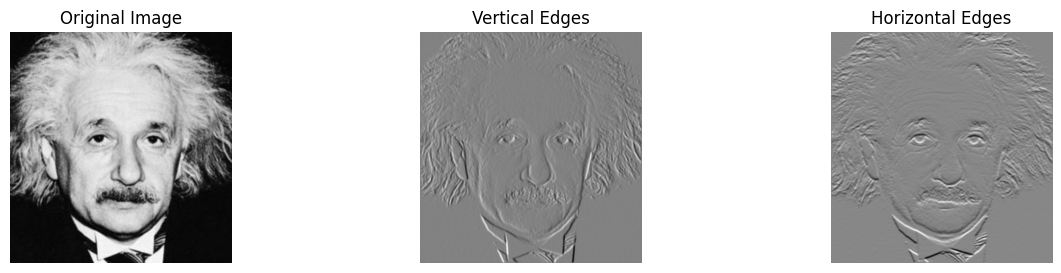

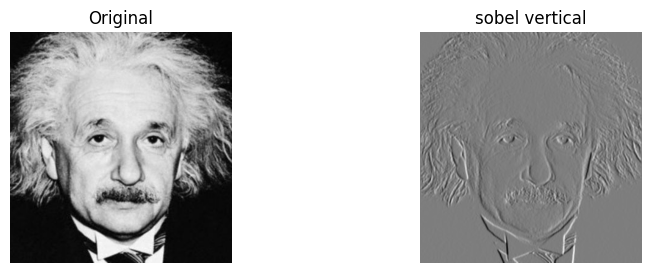

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

image = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE)

sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=15)
sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=15)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobelx, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(sobely, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')


#------------My Code-----------------

image = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE)

sobelx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelx = np.array(sobelx)
sobely = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
sobely = np.array(sobely)

def filter(image,kernal):
    assert kernal.shape[0]%2 == 1 and kernal.shape[1]%2 == 1
    k_hh , k_hw = math.floor(kernal.shape[0]/2) , math.floor(kernal.shape[1]/2)

    h,w = image.shape[0],image.shape[1]

    image_float = cv.normalize(image.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)

    result = np.zeros(image.shape,'float')

    for m in range(k_hh,h-k_hh):
        for n in range(k_hw,w-k_hw):
            result[m,n] = np.sum(image_float[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten()*kernal.flatten())


    return result


sobelx_image = filter(image,sobelx)
sobely_image = filter(image,sobely)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobelx_image, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(sobely_image, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')


#------------Filter2D-----------------

image = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

filter1 = [[1],[2],[1]]
filter1 = np.array(filter1, dtype='float')
filter2 = [[1,0,-1]]
filter2 = np.array(filter2, dtype='float')

filtered1 = cv.filter2D(image, -1, filter1)
filtered2 = cv.filter2D(filtered1, -1, filter2)

plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(132)
plt.imshow(filtered2,cmap='gray')
plt.title('sobel vertical')
plt.axis('off')



In this question sobel filtering is applied using direct sobel function, manually coding the sobel operation and applying to filters seperately to get final sobel output. Sobel filter is used to dtect edges of images. For that we convolve kernel with image. Depending on kernel size, how accurately we can detect edges changes. By more increasing kernel size can results in more accurate edge detection but it can also result in more noise. 

255


Text(0.5, 1.0, 'Scaled Original Image')

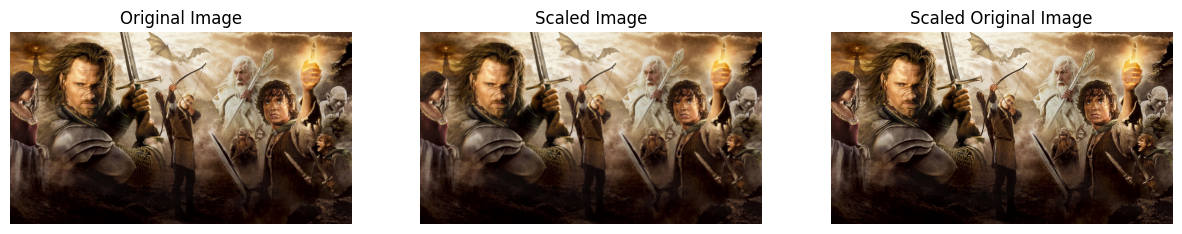

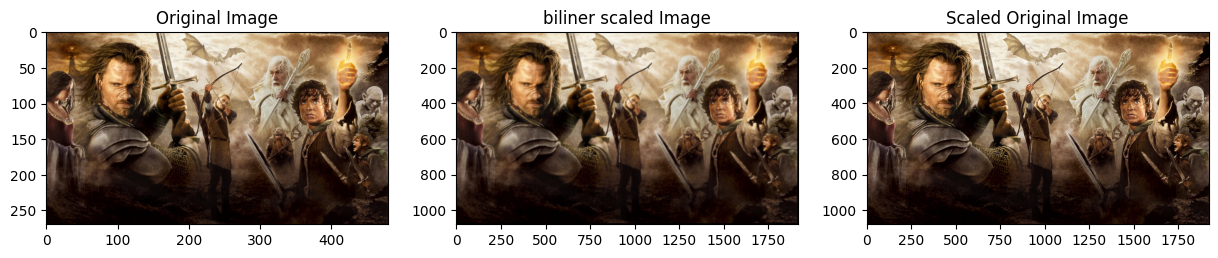

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math



image = cv.imread(r'E:\campus\5.sem5\image processing\A0\zooming\im01small.png', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
scaled_original = cv.imread(r'E:\campus\5.sem5\image processing\A0\zooming\im01.png', cv.IMREAD_COLOR)
scaled_original = cv.cvtColor(scaled_original, cv.COLOR_BGR2RGB)

#------------Nearest Neighbour-----------------

def scale(image, scale):
    h, w, c = image.shape
    scaled_image = np.zeros((int(h * scale), int(w * scale), c), dtype='uint8')
    for i in range(scaled_image.shape[0]):
        for j in range(scaled_image.shape[1]):
            scaled_image[i, j] = image[int(i / scale), int(j / scale)]
    return scaled_image

scaled_image = scale(image, 4)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(scaled_original)
plt.title('Scaled Original Image')
plt.axis('off')


#------------Bilinear Interpolation-----------------

def bilinear_interpolation(image,scale):
    height,width,chanels = image.shape
    bilinear_scaled_image = np.zeros((int(height*scale),int(width*scale),chanels),dtype='uint8')

    for channel in range(chanels):
        for i in range(bilinear_scaled_image.shape[0]):
            for j in range(bilinear_scaled_image.shape[1]):
                x= i/scale
                y= j/scale
                x1 = int(np.floor(x))
                x2 = min(x1+1,height-1)
                y1 = int(np.floor(y))
                y2 = min(y1+1,width-1)

                p1 = image[x1,y1,channel]*(x2-x) + image[x2,y1,channel]*(x-x1)

                p2 = image[x1,y2,channel]*(x2-x) + image[x2,y2,channel]*(x-x1)

                bilinear_scaled_image[i,j,channel] = p1*(y2-y) + p2*(y-y1)
                
            
    return bilinear_scaled_image




bilinear_scaled_image = bilinear_interpolation(image,4)
print(bilinear_scaled_image.max())
plt.figure(figsize=(15, 3))



plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(bilinear_scaled_image)
plt.title('biliner scaled Image')

plt.subplot(133)
plt.imshow(scaled_original)
plt.title('Scaled Original Image')


In this question zooming images is done using nearest neighbour interpolation and bilnear interpolation. Nearest neighbour interpolation is done by replicating the pixels. Bilinear is done by taking weighted average of 4 nearest pixels.

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

folder = 'zooming'

image_names = os.listdir(folder)

image_small = []
image_large = []

for image in image_names:
    if image.endswith('small.png'):
        image_path = os.path.join(folder, image)
        image_small.append(cv.imread(image_path, cv.IMREAD_COLOR))
    else:
        image_path = os.path.join(folder, image)
        image_large.append(cv.imread(image_path, cv.IMREAD_COLOR))


plt.figure(figsize=(5,5))
j=0
for i in image_small:
    j+=1
    bilinear_new_image = bilinear_interpolation(i, 4)
    print("bilinear image {}/11 done.".format(j))
    nearest_new_image = scale(i, 4)
    print("nearest image {}/11 done.".format(j))
    try:
        assert bilinear_new_image.shape == image_large[j-1].shape
        SSD1 = np.sum((bilinear_new_image-image_large[j-1])**2)
        normalized_SSD1 = SSD1/(np.sum(image_large[j-1]**2))
        print("Bilinear Normalized SSD = {:.2f}".format(normalized_SSD1))
        
    except AssertionError:
        print("Shape mismatch bilinear")
        print(bilinear_new_image.shape, image_large[j-1].shape )
        print('\n')
        continue

    try:
        assert nearest_new_image.shape == image_large[j-1].shape
        SSD2 = np.sum((nearest_new_image-image_large[j-1])**2)
        normalized_SSD2 = SSD2/(np.sum(image_large[j-1]**2))
        print("Nearest Normalized SSD = {:.2f}".format(normalized_SSD2))
        print('\n')
    except AssertionError:
        print("Shape mismatch nearest")
        print(nearest_new_image.shape, image_large[j-1].shape)
        print('\n')
        continue

bilinear image 1/11 done.
nearest image 1/11 done.
Bilinear Normalized SSD = 0.40
Nearest Normalized SSD = 0.32


bilinear image 2/11 done.
nearest image 2/11 done.
Bilinear Normalized SSD = 0.15
Nearest Normalized SSD = 0.11


bilinear image 3/11 done.
nearest image 3/11 done.
Shape mismatch bilinear
(1460, 2400, 3) (1459, 2400, 3)


bilinear image 4/11 done.
nearest image 4/11 done.
Bilinear Normalized SSD = 0.82
Nearest Normalized SSD = 0.79


bilinear image 5/11 done.
nearest image 5/11 done.
Bilinear Normalized SSD = 0.49
Nearest Normalized SSD = 0.46


bilinear image 6/11 done.
nearest image 6/11 done.
Bilinear Normalized SSD = 0.46
Nearest Normalized SSD = 0.39


bilinear image 7/11 done.
nearest image 7/11 done.
Bilinear Normalized SSD = 0.29
Nearest Normalized SSD = 0.27


bilinear image 8/11 done.
nearest image 8/11 done.
Shape mismatch bilinear
(1332, 2000, 3) (1333, 2000, 3)


bilinear image 9/11 done.
nearest image 9/11 done.
Bilinear Normalized SSD = 0.25
Nearest Normaliz

<Figure size 500x500 with 0 Axes>

# Question 09

(-0.5, 560.5, 840.5, -0.5)

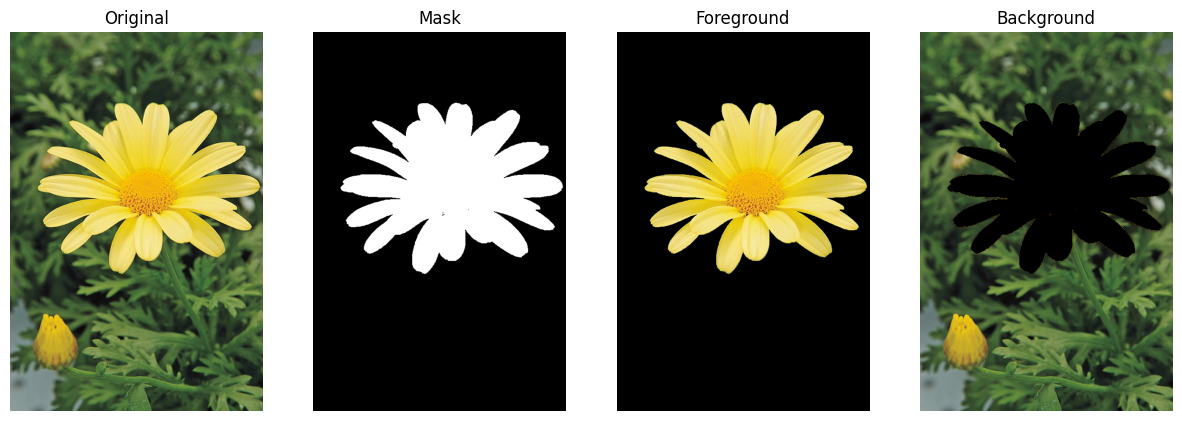

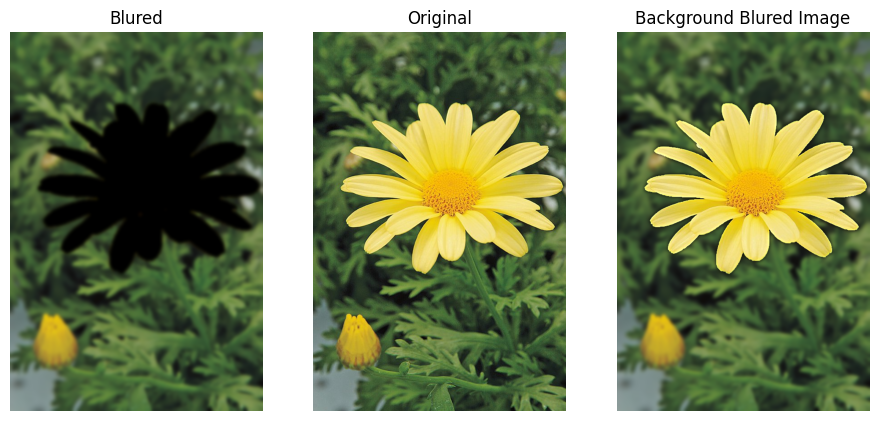

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'daisy.jpg',cv.IMREAD_COLOR)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,100,600,500)

(mask, bgdModel, fgdModel) = cv.grabCut(image, mask, rect, bgdModel, fgdModel, 8, cv.GC_INIT_WITH_RECT)

output_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output_mask = (output_mask*255).astype('uint8')

foreground_image = cv.bitwise_and(image,image,mask=output_mask)
background_image = cv.bitwise_and(image,image,mask=cv.bitwise_not(output_mask))

plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(output_mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(143)
plt.imshow(foreground_image)
plt.title('Foreground')
plt.axis('off')

plt.subplot(144)
plt.imshow(background_image)
plt.title('Background')
plt.axis('off')

blured = cv.GaussianBlur(background_image,(21,21),0)
background_blured = cv.add(foreground_image,blured)


plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(blured)
plt.title('Blured')
plt.axis('off')

plt.subplot(142)
plt.imshow(image)
plt.title('Original')
plt.axis('off')


plt.subplot(143)
plt.imshow(background_blured)
plt.title('Background Blured Image')
plt.axis('off')






Here GrabCut is used to segment foreground and background. Then foreground is added to blured background. 

When adding those two as mentioned in part c in question, I did not observed dark area just before the flower edges. But it can hapens sometimes. GrabCut is an iterative algorithm. How well it extracts foreground and background depends on the number of iterations. If it did not segment foreground well, when adding foreground to background, it can result in dark area just before the flower edges due to addition of pixel values.